## HW29
### 第3小隊_陳珮婕
參考資料:https://scikit-learn.org/stable/index.html

#### 作業前準備

In [ ]:
!pip3 install sklearn numpy pandas datetime joblib matplotlib seaborn
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import datetime
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

current_time = datetime.datetime.now()
current = datetime.date.today()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 718 kB/s 
     |████████████████████████████████| 251 kB 8.6 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=a0a878fd8f2ade1b1b9e9b8595c2425d8768aac7e255440b0211b2d14f2d1d34
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Mounted at /content/gdrive


In [ ]:
data2=pd.read_csv('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/機台資料_標籤.csv', index_col=None)

In [ ]:
data=data2.copy()
data['時間'] = pd.to_datetime(data['時間'])
data['裡面橫封溫度'] = data['裡面橫封溫度'].astype(str)
data['外面橫封溫度'] = data['外面橫封溫度'].astype(str)
data['橫封溫度設定'] = data['橫封溫度設定'].astype(str)
data['橫封溫度警報範圍'] = data['橫封溫度警報範圍'].astype(str)
data['豎封實際溫度'] = data['豎封實際溫度'].astype(str)
data['豎封溫度設定'] = data['豎封溫度設定'].astype(str)
data['打碼左邊實際溫度'] = data['打碼左邊實際溫度'].astype(str)
data['打碼右邊實際溫度'] = data['打碼右邊實際溫度'].astype(str)
data['標籤'] = data['標籤'].astype(str)
print(data.info())
print('空值數目', data.isnull().sum())
Xdata_original = data[['時間','裡面橫封溫度','外面橫封溫度','橫封溫度設定','橫封溫度警報範圍','豎封實際溫度','豎封溫度設定','打碼左邊實際溫度','打碼右邊實際溫度']]
Xdata = Xdata_original.drop(columns='時間')
Ydata = data['標籤']
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata.values , test_size=0.2, random_state=20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   時間        244 non-null    datetime64[ns]
 1   裡面橫封溫度    244 non-null    object        
 2   外面橫封溫度    244 non-null    object        
 3   橫封溫度設定    244 non-null    object        
 4   橫封溫度警報範圍  244 non-null    object        
 5   豎封實際溫度    244 non-null    object        
 6   豎封溫度設定    244 non-null    object        
 7   打碼左邊實際溫度  244 non-null    object        
 8   打碼右邊實際溫度  244 non-null    object        
 9   標籤        244 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 19.2+ KB
None
空值數目 時間          0
裡面橫封溫度      0
外面橫封溫度      0
橫封溫度設定      0
橫封溫度警報範圍    0
豎封實際溫度      0
豎封溫度設定      0
打碼左邊實際溫度    0
打碼右邊實際溫度    0
標籤          0
dtype: int64


#### 預測資料

In [ ]:
predict_data = pd.read_csv('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/機台預測資料.csv',encoding="utf-8")
predict_data['時間'] = pd.to_datetime(data['時間'])
predict_data['裡面橫封溫度'] = predict_data['裡面橫封溫度'].astype(str)
predict_data['外面橫封溫度'] = predict_data['外面橫封溫度'].astype(str)
predict_data['橫封溫度設定'] = predict_data['橫封溫度設定'].astype(str)
predict_data['橫封溫度警報範圍'] = predict_data['橫封溫度警報範圍'].astype(str)
predict_data['豎封實際溫度'] = predict_data['豎封實際溫度'].astype(str)
predict_data['豎封溫度設定'] = predict_data['豎封溫度設定'].astype(str)
predict_data['打碼左邊實際溫度'] = predict_data['打碼左邊實際溫度'].astype(str)
predict_data['打碼右邊實際溫度'] = predict_data['打碼右邊實際溫度'].astype(str)
print(predict_data.info())
print('空值數目', predict_data.isnull().sum())
predictX = predict_data[['裡面橫封溫度','外面橫封溫度','橫封溫度設定','橫封溫度警報範圍','豎封實際溫度','豎封溫度設定','打碼左邊實際溫度','打碼右邊實際溫度']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   時間        244 non-null    datetime64[ns]
 1   裡面橫封溫度    244 non-null    object        
 2   外面橫封溫度    244 non-null    object        
 3   橫封溫度設定    244 non-null    object        
 4   橫封溫度警報範圍  244 non-null    object        
 5   豎封實際溫度    244 non-null    object        
 6   豎封溫度設定    244 non-null    object        
 7   打碼左邊實際溫度  244 non-null    object        
 8   打碼右邊實際溫度  244 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 17.3+ KB
None
空值數目 時間          0
裡面橫封溫度      0
外面橫封溫度      0
橫封溫度設定      0
橫封溫度警報範圍    0
豎封實際溫度      0
豎封溫度設定      0
打碼左邊實際溫度    0
打碼右邊實際溫度    0
dtype: int64


#### 輸出函式

In [ ]:
def output(name,Y_pred_model,train_score,test_score,Y_pred_model_test):
  acc_model = round(train_score * 100, 2)
  acc_model_test = round(test_score * 100, 2)
  model_precision = round( precision_score(y_test, Y_pred_model, average="macro") * 100, 2)
  print(y_test, Y_pred_model)
  model_recall = round( recall_score(y_test, Y_pred_model, average="macro") * 100, 2)
  model_fscore = round( f1_score(y_test, Y_pred_model, average="macro") * 100, 2)


  models = pd.DataFrame({
    'Train': [name],
    'accuracy': [acc_model],
    'test': [acc_model_test],
    'precision': [model_precision],
    'recall': [model_recall],
    'fscore': [model_fscore],
  })

  models.sort_values(by='accuracy', ascending=False)
  models.to_csv('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/綜合表/'+name+'綜合表.csv',index=False)
  print(models)

  # 輸出 knn confusion matrix
  model_cm  = confusion_matrix(y_test,Y_pred_model)
  model_cms = sns.heatmap(model_cm, square=True, annot=True, cbar=False, fmt='g')
  model_cms.set_title('demo_'+name+'_confusion_matrix')
  model_cms.set_xlabel("predicted value")
  model_cms.set_ylabel("true value")
  plt.rcParams['font.sans-serif']=['SimHei']
  plt.rcParams['axes.unicode_minus'] = False
  plt.savefig('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/images/'+name+'_confusion_matrix.png', dpi=200)
  plt.show()
  plt.close()

  # 進行預測
  predict_result = pd.DataFrame(Y_pred_model_test)
  predict_result.rename( columns={0: '預測結果'}, inplace=True)

  predict_dataframe = pd.concat([predict_data,predict_result],axis=1)
  predict_dataframe.sort_values('時間', inplace=True, ascending=True)
  predict_dataframe.to_csv('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/機台預測結果/'+name+'機台預測結果.csv',index=False)
  #print(predict_dataframe)

#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True)#初始化演算法
svm.fit(X_train, y_train)#把資料丟入演算法
Y_pred_svm = svm.predict(X_test)#儲存預測數值
svm_train_score=svm.score(X_train, y_train)
svm_test_score=svm.score(X_test, y_test)

Y_pred_svm_test=svm.predict(predictX)
pickle.dump(svm, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'svm'+'.pkl', 'wb'))

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '2' '0' '0' '2' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']


  Train  accuracy   test  precision  recall  fscore
0   svm     98.97  95.92      83.33   77.78   72.22


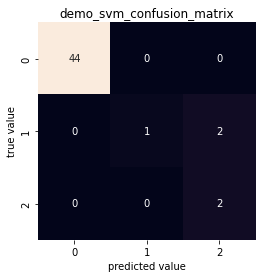

In [ ]:
output("svm",Y_pred_svm,svm_train_score,svm_test_score,Y_pred_svm_test)

#### Logistic Regression

In [ ]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()#初始化資料
lr.fit(X_train,y_train)#丟入資料
Y_pred_lr = lr.predict(X_test)#儲存預測數值
lr_train_score=lr.score(X_train, y_train)
lr_test_score=lr.score(X_test, y_test)
Y_pred_lr_test=lr.predict(predictX)
pickle.dump(lr, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'Logistic Regression'+'.pkl', 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
                 Train  accuracy   test  precision  recall  fscore
0  Logistic Regression     98.46  100.0      100.0   100.0   100.0


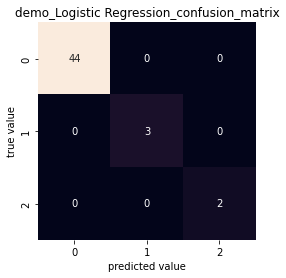

In [ ]:
output("Logistic Regression",Y_pred_lr,lr_train_score,lr_test_score,Y_pred_lr_test)

#### GaussianNB

In [ ]:
from sklearn import naive_bayes
GNB=naive_bayes.GaussianNB()
GNB.fit(X_train,y_train)
Y_pred_GNB=GNB.predict(X_test)
GNB_train_score=GNB.score(X_train, y_train)
GNB_test_score=GNB.score(X_test, y_test)
Y_pred_GNB_test=GNB.predict(predictX)
pickle.dump(GNB, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'GaussianNB'+'.pkl', 'wb'))

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '2' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
        Train  accuracy   test  precision  recall  fscore
0  GaussianNB     98.46  97.96      88.89   88.89   86.67


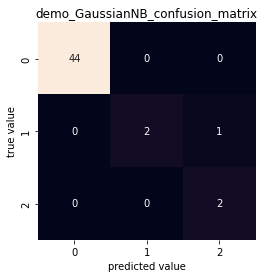

In [ ]:
output("GaussianNB",Y_pred_GNB,GNB_train_score,GNB_test_score,Y_pred_GNB_test)

#### Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
Per = Perceptron()
Per.fit(X_train,y_train)
Y_pred_Per=Per.predict(X_test)
Per_train_score=Per.score(X_train, y_train)
Per_test_score=Per.score(X_test, y_test)
Y_pred_Per_test=Per.predict(predictX)
pickle.dump(Per, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'Perceptron'+'.pkl', 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
        Train  accuracy   test  precision  recall  fscore
0  Perceptron     96.92  93.88      64.54   66.67   65.57


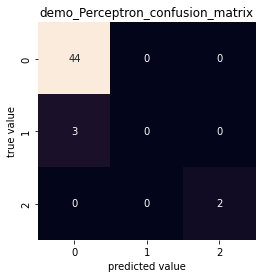

In [ ]:
output("Perceptron",Y_pred_Per,Per_train_score,Per_test_score,Y_pred_Per_test)

#### Stochastic Gradient Decent

In [ ]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD.fit(X_train,y_train)
Y_pred_SGD=SGD.predict(X_test)
SGD_train_score=SGD.score(X_train, y_train)
SGD_test_score=SGD.score(X_test, y_test)
Y_pred_SGD_test=SGD.predict(predictX)
pickle.dump(SGD, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'Stochastic Gradient Decent'+'.pkl', 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '0' '2' '0' '0' '2' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
                        Train  accuracy   test  precision  recall  fscore
0  Stochastic Gradient Decent     97.44  93.88      46.67   66.67   52.38


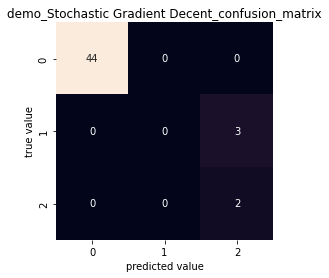

In [ ]:
output("Stochastic Gradient Decent",Y_pred_SGD,SGD_train_score,SGD_test_score,Y_pred_SGD_test)

#### Linear SVC

In [ ]:
from sklearn import svm
Lsvc = svm.LinearSVC(random_state=0)
Lsvc.fit(X_train,y_train)
Y_pred_Lsvc=Lsvc.predict(X_test)
Lsvc_train_score=Lsvc.score(X_train, y_train)
Lsvc_test_score=Lsvc.score(X_test, y_test)
Y_pred_Lsvc_test=Lsvc.predict(predictX)
pickle.dump(Lsvc, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'Linear SVC'+'.pkl', 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
        Train  accuracy   test  precision  recall  fscore
0  Linear SVC     95.38  91.84       43.0   44.44    43.7


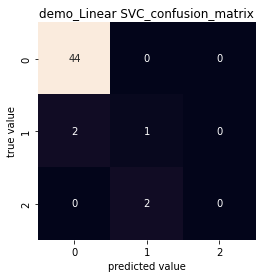

In [ ]:
output("Linear SVC",Y_pred_Lsvc,Lsvc_train_score,Lsvc_test_score,Y_pred_Lsvc_test)

#### Descion Tree3、4、5


參考資料:

https://www.796t.com/content/1546975998.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision+tree

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '2' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
           Train  accuracy   test  precision  recall  fscore
0  Descion Tree3     98.97  97.96      88.89   88.89   86.67


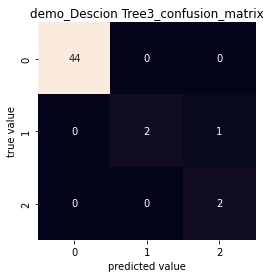

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
           Train  accuracy   test  precision  recall  fscore
0  Descion Tree4     99.49  100.0      100.0   100.0   100.0


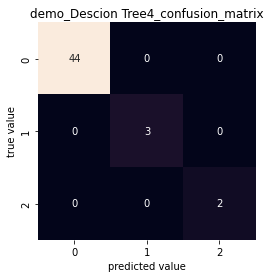

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
           Train  accuracy   test  precision  recall  fscore
0  Descion Tree5     99.49  100.0      100.0   100.0   100.0


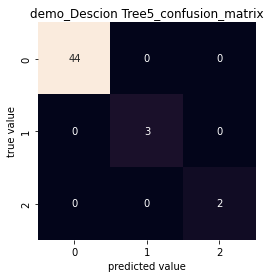

In [ ]:
from sklearn.tree import DecisionTreeClassifier
for i in range(3,6,1):
  number_str=str(i)
  Dtree=DecisionTreeClassifier(max_depth=i)
  Dtree.fit(X_train,y_train)
  Y_pred_Dtree=Dtree.predict(X_test)
  Dtree_train_score=Dtree.score(X_train, y_train)
  Dtree_test_score=Dtree.score(X_test, y_test)
  Y_pred_Dtree_test=Dtree.predict(predictX)
  pickle.dump(Dtree, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'Descion Tree'+number_str+'.pkl', 'wb'))
  output('Descion Tree'+number_str,Y_pred_Dtree,Dtree_train_score,Dtree_test_score,Y_pred_Dtree_test)

#### MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
Mnb= MultinomialNB()
Mnb.fit(X_train,y_train)
Y_pred_Mnb=Mnb.predict(X_test)
Mnb_train_score=Mnb.score(X_train, y_train)
Mnb_test_score=Mnb.score(X_test, y_test)
Y_pred_Mnb_test=Mnb.predict(predictX)
pickle.dump(Mnb, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'MultinomialNB'+'.pkl', 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
           Train  accuracy  test  precision  recall  fscore
0  MultinomialNB     95.38  89.8      29.93   33.33   31.54


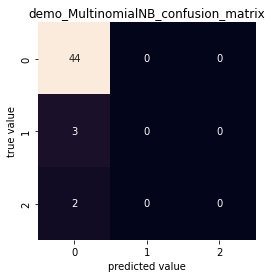

In [ ]:
output("MultinomialNB",Y_pred_Mnb,Mnb_train_score,Mnb_test_score,Y_pred_Mnb_test)

#### Complement NB

In [ ]:
from sklearn.naive_bayes import ComplementNB
ComNB = ComplementNB()
ComNB.fit(X_train,y_train)
Y_pred_ComNB=ComNB.predict(X_test)
ComNB_train_score=ComNB.score(X_train, y_train)
ComNB_test_score=ComNB.score(X_test, y_test)
Y_pred_ComNB_test=ComNB.predict(predictX)
pickle.dump(ComNB, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'Complement NB'+'.pkl', 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '0' '2' '0' '0' '2' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
           Train  accuracy   test  precision  recall  fscore
0  Complement NB     97.44  93.88      46.67   66.67   52.38


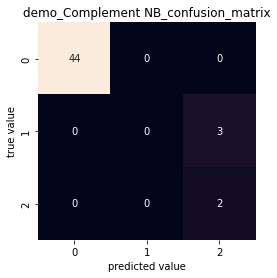

In [ ]:
output("Complement NB",Y_pred_ComNB,ComNB_train_score,ComNB_test_score,Y_pred_ComNB_test)

#### BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
Bnb= BernoulliNB()
Bnb.fit(X_train,y_train)
Y_pred_Bnb=Bnb.predict(X_test)
Bnb_train_score=Bnb.score(X_train, y_train)
Bnb_test_score=Bnb.score(X_test, y_test)
Y_pred_Bnb_test=Bnb.predict(predictX)
pickle.dump(Bnb, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'BernoulliNB'+'.pkl', 'wb'))
#print(Y_pred_Bnb,"      ",Bnb_train_score,"      ",Bnb_test_score,"      ",Y_pred_Bnb_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
         Train  accuracy  test  precision  recall  fscore
0  BernoulliNB     95.38  89.8      29.93   33.33   31.54


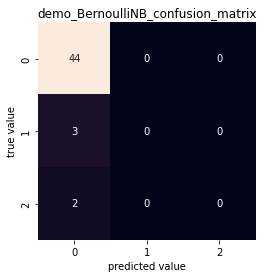

In [ ]:
output("BernoulliNB",Y_pred_Bnb,Bnb_train_score,Bnb_test_score,Y_pred_Bnb_test)

#### Bayesian Regression

In [ ]:
from sklearn.linear_model import BayesianRidge
BayReg=BayesianRidge()
BayReg.fit(X_train,y_train)
Y_pred_BayReg=BayReg.predict(X_test).round(0).astype(int).astype(str)
BayReg_train_score=BayReg.score(X_train, y_train)
BayReg_test_score=BayReg.score(X_test, y_test)
Y_pred_BayReg_test=BayReg.predict(predictX).round(0).astype(int).astype(str)
pickle.dump(BayReg, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'Bayesian Regression'+'.pkl', 'wb'))
#print(Y_pred_BayReg,"   ",BayReg_train_score,"   ",BayReg_test_score,"   ",Y_pred_BayReg_test)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
                 Train  accuracy  test  precision  recall  fscore
0  Bayesian Regression     80.58  94.8      100.0   100.0   100.0


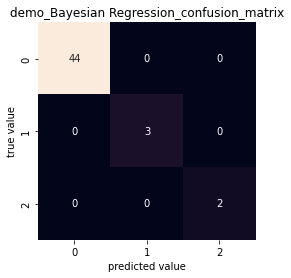

In [ ]:
output("Bayesian Regression",Y_pred_BayReg,BayReg_train_score,BayReg_test_score,Y_pred_BayReg_test)

#### Logistic Regression(題目重複)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
Y_pred_logreg=logreg.predict(X_test)
logreg_train_score=logreg.score(X_train, y_train)
logreg_test_score=logreg.score(X_test, y_test)
Y_pred_logreg_test=logreg.predict(predictX)
pickle.dump(logreg, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'Logistic Regression'+'.pkl', 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
                 Train  accuracy   test  precision  recall  fscore
0  Logistic Regression     98.46  100.0      100.0   100.0   100.0


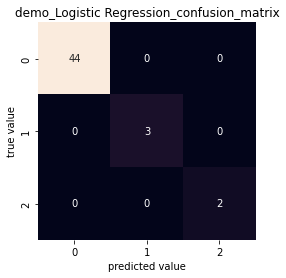

In [ ]:
output("Logistic Regression",Y_pred_logreg,logreg_train_score,logreg_test_score,Y_pred_logreg_test)

#### Generalized Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
GLR=LinearRegression()
GLR.fit(X_train,y_train)
Y_pred_GLR=GLR.predict(X_test).round(0).astype(int).astype(str)
GLR_train_score=GLR.score(X_train, y_train)
GLR_test_score=GLR.score(X_test, y_test)
Y_pred_GLR_test=GLR.predict(predictX).round(0).astype(int).astype(str)
pickle.dump(GLR, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'Generalized Linear Regression'+'.pkl', 'wb'))

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
                           Train  accuracy   test  precision  recall  fscore
0  Generalized Linear Regression     80.62  94.45      100.0   100.0   100.0


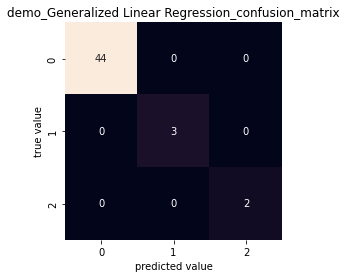

In [ ]:
output("Generalized Linear Regression",Y_pred_GLR,GLR_train_score,GLR_test_score,Y_pred_GLR_test)

#### Gaussian Process Regression (GPR)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
GPR=GaussianProcessRegressor()
GPR.fit(X_train,y_train)
Y_pred_GPR=GPR.predict(X_test).round(0).astype(int).astype(str)
GPR_train_score=GPR.score(X_train, y_train)
GPR_test_score=GPR.score(X_test, y_test)
Y_pred_GPR_test=GPR.predict(predictX).round(0).astype(int).astype(str)
pickle.dump(GPR, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'GaussianProcessRegressor'+'.pkl', 'wb'))
#print(Y_pred_GPR,"   ",GPR_train_score,"   ",GPR_test_score,"   ",Y_pred_GPR_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
                      Train  accuracy   test  precision  recall  fscore
0  GaussianProcessRegressor     100.0  37.48       43.0   44.44    43.7


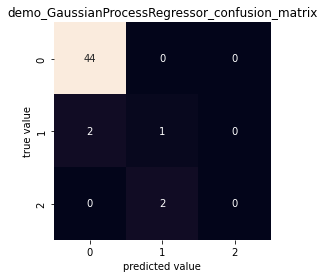

In [ ]:
output("GaussianProcessRegressor",Y_pred_GPR,GPR_train_score,GPR_test_score,Y_pred_GPR_test)

#### Categorical NB

In [ ]:
from sklearn.naive_bayes import CategoricalNB
CateNB= CategoricalNB(min_categories=Xdata.nunique())
int_X_train=X_train.copy().astype(float)
int_X_test=X_test.copy().astype(float)
int_predictX=predictX.copy().astype(float)

CateNB.fit(int_X_train,y_train)
Y_pred_CateNB=CateNB.predict(int_X_test)
#print(int_X_train.shape, y_train.shape)
CateNB_train_score=CateNB.score(int_X_train, y_train)

CateNB_test_score=CateNB.score(int_X_test, y_test)
Y_pred_CateNB_test=CateNB.predict(int_predictX)
pickle.dump(CateNB, open('/content/gdrive/MyDrive/資料科學家/第八堂課程練習/pkl/'+'Categorical NB'+'.pkl', 'wb'))
#print(Y_pred_CateNB_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '2' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'] ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
            Train  accuracy  test  precision  recall  fscore
0  Categorical NB     95.38  89.8      29.93   33.33   31.54


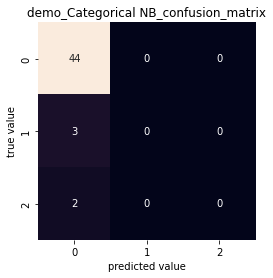

In [ ]:
output("Categorical NB",Y_pred_CateNB,CateNB_train_score,CateNB_test_score,Y_pred_CateNB_test)